## Compare and explain the different approaches you might have considered.

There are several approaches i considered for this time series forecasting task.

**1. Traditional Statistical Methods:**

* **ARIMA (Autoregressive Integrated Moving Average):** This is a powerful method for stationary time series data with trends and seasonality. However, it requires stationarity in the data, which might not be the case here
* **Exponential Smoothing:** This is a simpler approach good for short-term forecasting and capturing recent trends.  It could be a good option if the goal was very short-term predictions and the data was found to be stationary.

**2. Machine Learning Algorithms:**

* **Linear Regression:** This is a baseline model that captures linear relationships. It's a good starting point, but it might not capture non-linear patterns in sourcing cost.
* **Ridge Regression and Lasso Regression:** These are regularization techniques that can improve the performance of linear regression by reducing overfitting. They were included as they can handle some non-linearity and potentially reduce overfitting compared to basic linear regression.
* **Random Forest Regressor:** This ensemble method is robust to outliers and can capture complex relationships. It was a strong choice due to its ability to handle potentially complex relationships in the data and its resilience to outliers.
* **Gradient Boosting Regressor:** Similar to Random Forest, this ensemble technique is powerful for complex relationships. It was another good option for similar reasons to Random Forest Regressor.
* **Support Vector Regressor (SVR):** This method is well-suited for high-dimensional data with non-linear relationships. It was included to explore its effectiveness in capturing potentially complex non-linear patterns.

## Explain the final approach you have taken and why.

The final approach involved using a pipeline that combined data preprocessing with a Random Forest Regressor model.

1. **Data Preprocessing:**
   * **Missing value imputation:** Simple imputation techniques were used to address missing values in both numerical and categorical features. This ensures the model can handle the complete data effectively.
   * **One-Hot Encoding:** Categorical features were encoded using one-hot encoding to transform them into numerical features suitable for the model.
2. **Random Forest Regressor:**
   * This ensemble method was chosen because it is robust to outliers and can capture complex, non-linear relationships that might exist in the sourcing cost data. While other models like Gradient Boosting Regressor could have been contenders, Random Forest is generally less prone to overfitting and can be computationally faster to train.
3. **Model Selection with Cross-Validation:**
   * A pipeline combining the preprocessor and different regression models (Linear Regression, Ridge, Lasso, Random Forest, Gradient Boosting, SVR) were evaluated using cross-validation. This helps identify the model with the best performance on unseen data and reduces overfitting.
   * The Random Forest Regressor emerged as the model with the lowest mean squared error (MSE) across the cross-validation folds, indicating its superior predictive power for this specific dataset and problem.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [ ]:
df = pd.read_csv("/content/train.csv")
df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [ ]:
df.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         1
Product Type         1
Month of Sourcing    2
Sourcing Cost        2
dtype: int64

In [ ]:
df.describe()

,Sourcing Cost
count,572874.000000
mean,108.697829
std,103.440282
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.050000
max,32632.500000


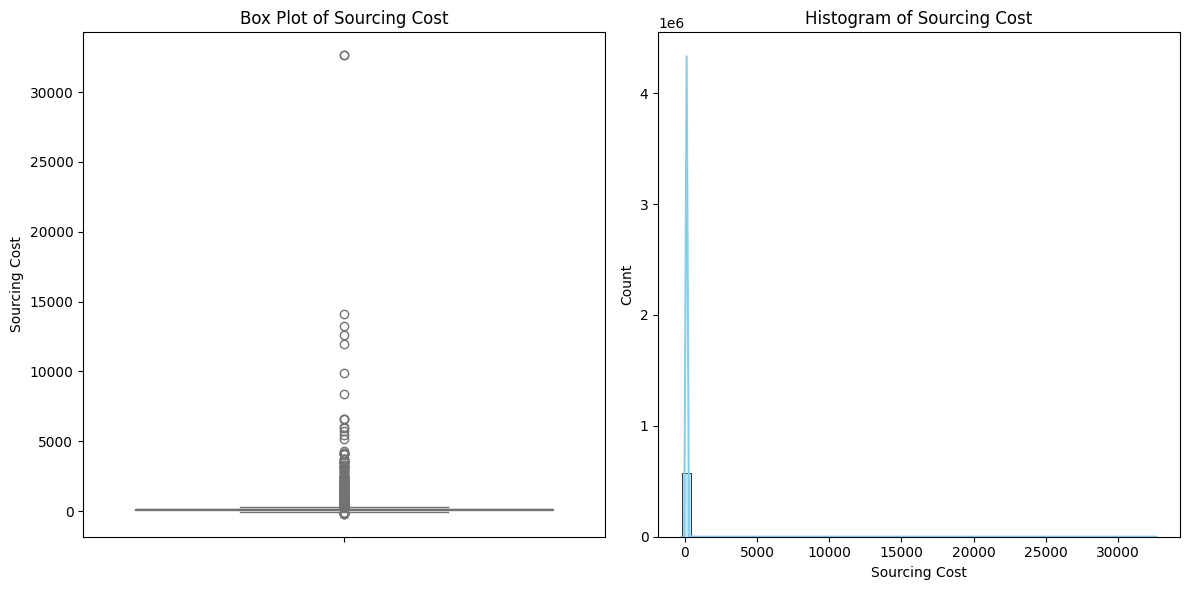

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(df['Sourcing Cost'], color='lightgreen')
plt.title('Box Plot of Sourcing Cost')
plt.subplot(1, 2, 2)
sns.histplot(df['Sourcing Cost'], bins=50, kde=True, color='skyblue')
plt.title('Histogram of Sourcing Cost')
plt.tight_layout()
plt.show()

In [ ]:
threshold = 1
cleaned_df = df[df['Sourcing Cost'] > threshold]
print("Cleaned Dataset:")
print(cleaned_df)


Cleaned Dataset:
       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0             NTM3           X1       A28        WHOLESALE        Large   
1             NTM2           X1        A9           DIRECT        Large   
2             NTM3           X2       A20           DIRECT        Large   
3             NTM3           X1       A18        WHOLESALE        Small   
4             NTM2           X1       A28           DIRECT        Large   
...            ...          ...       ...              ...          ...   
572871        NTM2           X1        A5           DIRECT        Large   
572872        NTM3           X1       A14           DIRECT        Large   
572873        NTM2           X1        A5           DIRECT        Small   
572874        NTM2           X1        A7           DIRECT        Small   
572875        NTM1           X1        A3           DIRECT        Small   

       Product Type Month of Sourcing  Sourcing Cost  
0            Powder        

In [ ]:
Q1 = cleaned_df['Sourcing Cost'].quantile(0.25)
Q3 = cleaned_df['Sourcing Cost'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [ ]:
db = cleaned_df[(cleaned_df['Sourcing Cost'] >= lower_bound) & (cleaned_df['Sourcing Cost'] <= upper_bound)]
print("Cleaned Dataset without Outliers:")

Cleaned Dataset without Outliers:


In [ ]:
db.describe()

,Sourcing Cost
count,550270.000000
mean,109.927221
std,52.956752
min,1.130000
25%,64.320000
50%,133.300000
75%,146.550000
max,269.770000


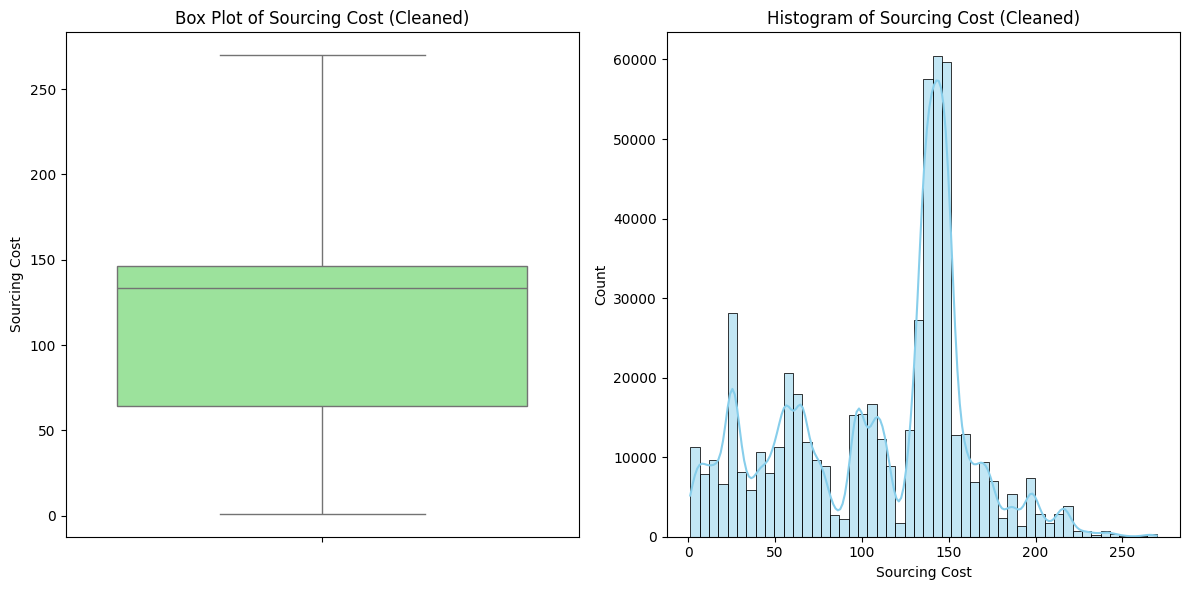

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(db['Sourcing Cost'], color='lightgreen')
plt.title('Box Plot of Sourcing Cost (Cleaned)')
plt.subplot(1, 2, 2)
sns.histplot(db['Sourcing Cost'], bins=50, kde=True, color='skyblue')
plt.title('Histogram of Sourcing Cost (Cleaned)')
plt.tight_layout()
plt.show()


In [ ]:
total_rows_before = len(df)
total_rows_after = len(db)
row_loss = total_rows_before - total_rows_after
print("Total rows before cleaning:", total_rows_before)
print("Total rows after cleaning:", total_rows_after)
print("Loss of data (rows):", row_loss)


Total rows before cleaning: 572876
Total rows after cleaning: 550270
Loss of data (rows): 22606


In [ ]:
test_df = pd.read_csv("/content/DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv")
X_train = db.drop(columns=["Sourcing Cost"])
y_train = db["Sourcing Cost"]
X_test = test_df

In [ ]:
numerical_features = X_train.select_dtypes(include=["float64", "int64"]).columns
categorical_features = X_train.select_dtypes(include=["object"]).columns

In [ ]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ])

In [ ]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
]

In [ ]:
best_model = None
best_mse = float('inf')
for model in models:
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    mse_scores = -cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_mse = mse_scores.mean()
    if mean_mse < best_mse:
        best_model = model
        best_mse = mean_mse
print(f"Best Model: {best_model.__class__.__name__}, Mean Squared Error: {best_mse}")


Best Model: RandomForestRegressor, Mean Squared Error: 291.86920379666833


In [ ]:
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("regressor", RandomForestRegressor())])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index([], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor())])

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(predictions )

[107.0792217  155.9398465  148.60943709 143.18319696 166.40435392
 173.57716137  49.07332706  56.52       149.3492801  148.46412656
 149.87584776 133.3         95.         143.34008889 143.03089337
 153.89642409 157.55023306 142.0655927  142.47445242 149.56326767
 151.09922974 148.03134079 148.98421904  31.15094231  78.31244938
  41.13447102  89.01356297  31.46663741  24.57632335 200.71911979
 184.81434994 169.47105045  36.44534019  26.19636807  68.16
 149.5033085  151.59184134 145.34809347 143.506161    97.63453853
  60.99408272 110.50357225 173.40999883 172.89166296  55.60213539
  39.11148162 197.11460243 196.87664166  99.04630842  56.52
  56.52       149.13056395  97.7273      60.35840578 186.0749166
 166.2669711  180.         199.35456594 199.66832515 143.49661782
 136.22975987 149.86487029 149.23931698 142.73931609 142.79850332
 143.18915087 145.31298571 142.28453088 142.43236125 153.51006069
 148.41933513 114.05039279  66.39361682  71.5746905   23.45235291
  54.3815515   26.13196

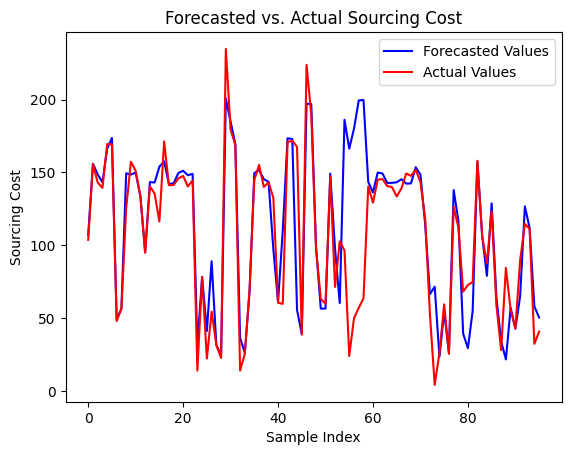

In [ ]:
actual_values = test_df["Sourcing Cost"]
plt.plot(range(len(predictions)), predictions, label='Forecasted Values', color='blue')
plt.plot(range(len(actual_values)), actual_values, label='Actual Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Sourcing Cost')
plt.title('Forecasted vs. Actual Sourcing Cost')
plt.legend()
plt.show()